In [218]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns

In [219]:
course = pd.read_csv('data/udemy_course_data.csv')[0:20]

In [220]:
course.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,TRUE,200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,TRUE,75,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,TRUE,45,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,TRUE,95,2451,11,36,All Levels,3 hours,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,TRUE,200,1276,45,26,Intermediate Level,2 hours,2016-12-13T14:57:18Z,Business Finance


In [221]:
user = pd.read_csv('data/user_rating.csv')

In [222]:
user.head()

,userid,course_id,rating
0,1,1070968,3
1,2,1070968,4
2,3,1070968,5
3,4,1070968,2
4,5,1070968,3


In [223]:
final_dataset = user.pivot(index='course_id',columns='userid',values='rating')
final_dataset.head()

userid,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
course_id,,,,,,,,,,,,,,,,,,,,
192870,4,5,4,5,4,3,3,4,3,4,4,4,3,4,3,4,3,4,3,4
403100,4,3,4,4,3,4,5,4,3,2,3,4,3,4,3,4,4,3,4,3
476268,3,3,4,3,5,4,3,4,4,5,4,3,4,3,4,3,4,3,4,4
592338,4,3,4,3,4,3,4,2,5,4,5,4,5,4,3,4,5,4,3,4
739964,4,5,4,3,4,3,4,3,4,5,4,3,4,3,4,5,4,3,4,3


In [228]:
final_dataset.fillna(0,inplace=True)
final_dataset.head()

userid,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
course_id,,,,,,,,,,,,,,,,,,,,
192870,4,5,4,5,4,3,3,4,3,4,4,4,3,4,3,4,3,4,3,4
403100,4,3,4,4,3,4,5,4,3,2,3,4,3,4,3,4,4,3,4,3
476268,3,3,4,3,5,4,3,4,4,5,4,3,4,3,4,3,4,3,4,4
592338,4,3,4,3,4,3,4,2,5,4,5,4,5,4,3,4,5,4,3,4
739964,4,5,4,3,4,3,4,3,4,5,4,3,4,3,4,5,4,3,4,3


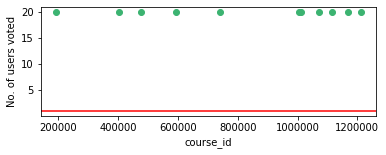

In [229]:
f,ax = plt.subplots(1,1,figsize=(6,2))
# ratings['rating'].plot(kind='hist')
plt.scatter(no_user_voted.index,no_user_voted,color='mediumseagreen')
plt.axhline(y=1,color='r')
plt.xlabel('course_id')
plt.ylabel('No. of users voted')
plt.show()

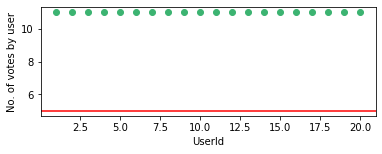

In [227]:
f,ax = plt.subplots(1,1,figsize=(6,2))
plt.scatter(no_course_voted.index,no_course_voted,color='mediumseagreen')
plt.axhline(y=5,color='r')
plt.xlabel('UserId')
plt.ylabel('No. of votes by user')
plt.show()

In [230]:
final_dataset.head()

userid,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
course_id,,,,,,,,,,,,,,,,,,,,
192870,4,5,4,5,4,3,3,4,3,4,4,4,3,4,3,4,3,4,3,4
403100,4,3,4,4,3,4,5,4,3,2,3,4,3,4,3,4,4,3,4,3
476268,3,3,4,3,5,4,3,4,4,5,4,3,4,3,4,3,4,3,4,4
592338,4,3,4,3,4,3,4,2,5,4,5,4,5,4,3,4,5,4,3,4
739964,4,5,4,3,4,3,4,3,4,5,4,3,4,3,4,5,4,3,4,3


In [231]:
sample = np.array([[0,0,3,0,0],[4,0,0,0,2],[0,0,0,0,1]])
sparsity = 1.0 - ( np.count_nonzero(sample) / float(sample.size) )
print(sparsity)

0.7333333333333334


In [232]:
csr_sample = csr_matrix(sample)
print(csr_sample)

  (0, 2)	3
  (1, 0)	4
  (1, 4)	2
  (2, 4)	1


In [233]:
csr_data = csr_matrix(final_dataset.values)
final_dataset.reset_index(inplace=True)

In [234]:
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=2, n_jobs=-1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=-1, n_neighbors=2, p=2, radius=1.0)

In [244]:
def get_course_recommendation(course_name):
    n_courses_to_reccomend = 10
    course_list = course[course['course_title'].str.contains(course_name)]  
    if len(course_list):        
        course_idx= course_list.iloc[0]['course_id']
        course_idx = final_dataset[final_dataset['course_id'] == course_idx].index[0]
        distances , indices = knn.kneighbors(csr_data[course_idx],n_neighbors=5)    
        rec_course_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
        recommend_frame = []
        for val in rec_course_indices:
            course_idx = final_dataset.iloc[val[0]]['course_id']
            idx = course[course['course_id'] == course_idx].index
            recommend_frame.append({'Title':course.iloc[idx]['course_title'].values[0],'Distance':val[1]})
        df = pd.DataFrame(recommend_frame,index=range(1,5))
        return df
    else:
        return "No course found. Please check your input"

In [245]:
get_course_recommendation('Ultimate Investment Banking Course')

,Title,Distance
1,Forex Trading Secrets of the Pros With Amazon'...,0.051866
2,How To Maximize Your Profits Trading Options,0.050040
3,Investing And Trading For Beginners: Mastering...,0.047399
4,Options Trading 3 : Advanced Stock Profit and ...,0.027364
